In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:

data = pd.read_csv("breast-cancer-wisconsin.data", names= ['id number', 'Clump Thickness', 'Uniformity of Cell Size',
    'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
    'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'])

In [3]:
del data['id number']
data.head(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [4]:
for col in data.columns:
    print(f"Unique values in {col}:", data[col].unique())

Unique values in Clump Thickness: [ 5  3  6  4  8  1  2  7 10  9]
Unique values in Uniformity of Cell Size: [ 1  4  8 10  2  3  7  5  6  9]
Unique values in Uniformity of Cell Shape: [ 1  4  8 10  2  3  5  6  7  9]
Unique values in Marginal Adhesion: [ 1  5  3  8 10  4  6  2  9  7]
Unique values in Single Epithelial Cell Size: [ 2  7  3  1  6  4  5  8 10  9]
Unique values in Bare Nuclei: ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
Unique values in Bland Chromatin: [ 3  9  1  2  4  5  7  8  6 10]
Unique values in Normal Nucleoli: [ 1  2  7  4  5  3 10  6  9  8]
Unique values in Mitoses: [ 1  5  4  2  3  7 10  8  6]
Unique values in Class: [2 4]


In [5]:
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

In [6]:
data.shape

(683, 10)

In [7]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
data.dtypes

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

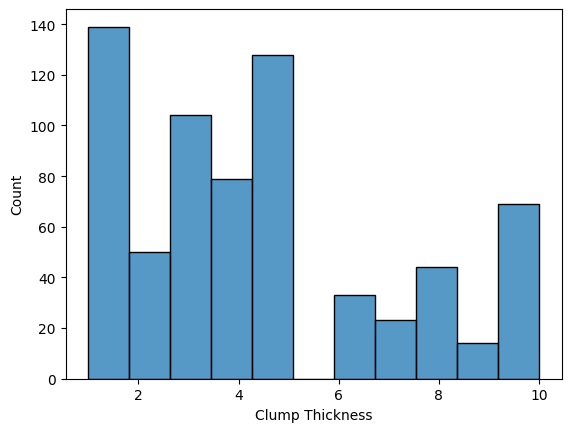

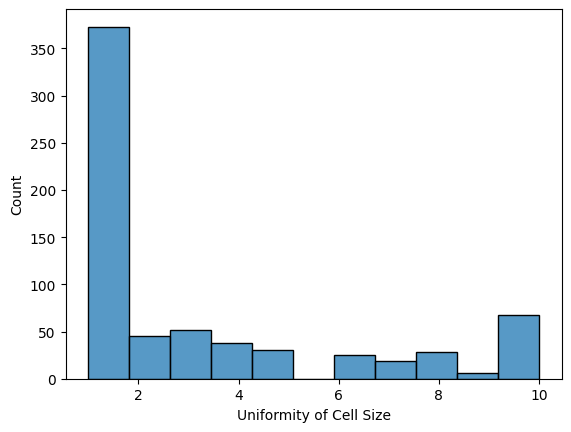

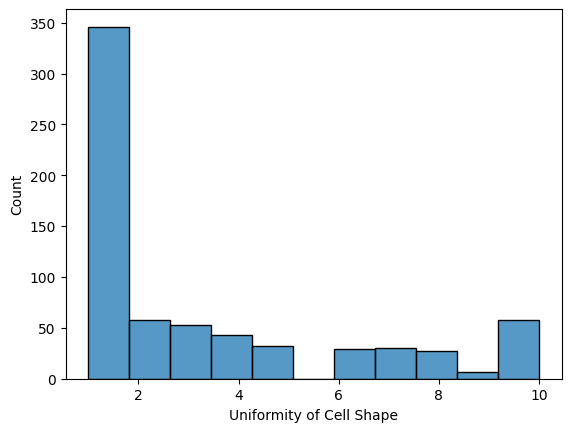

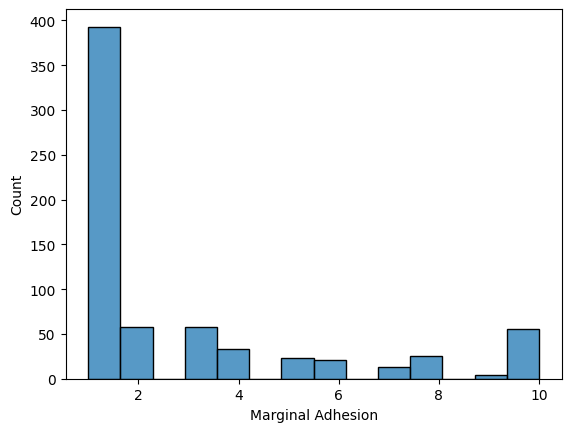

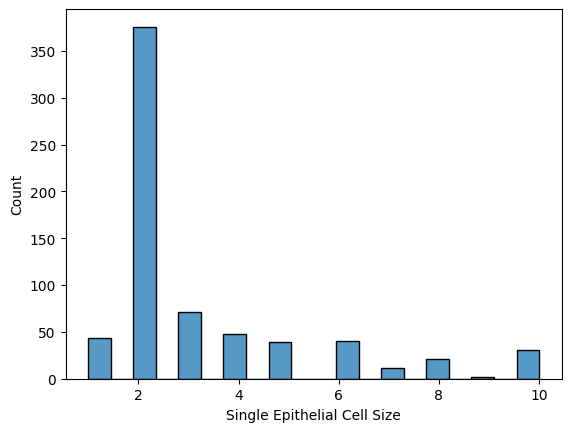

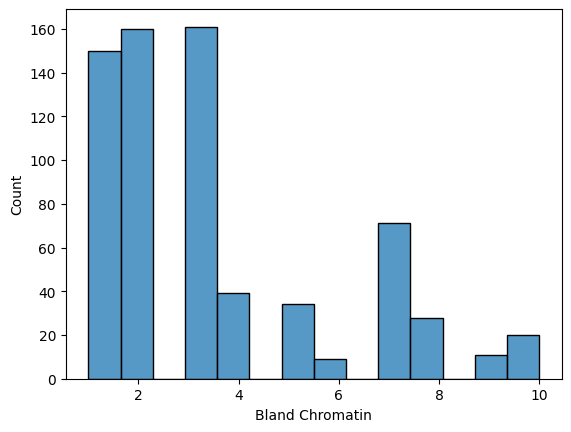

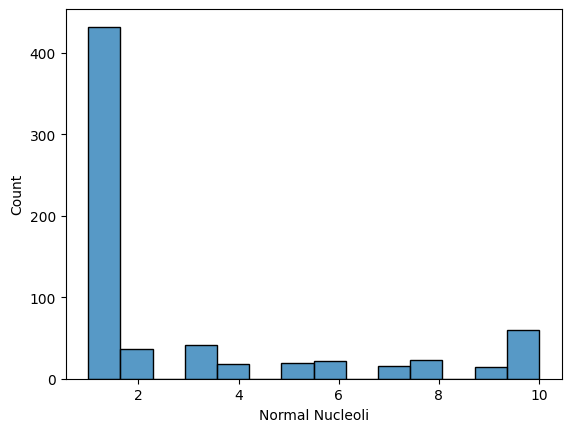

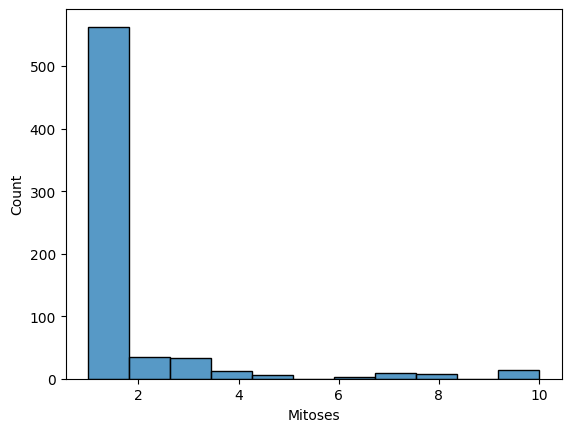

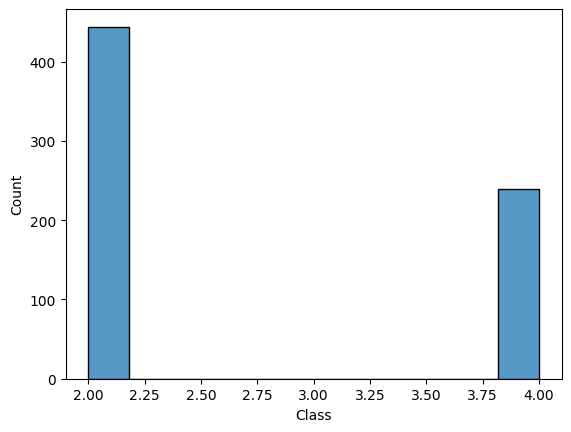

In [9]:
for i in data.select_dtypes(include='number').columns:
    sns.histplot(data=data, x=i)
    plt.show()

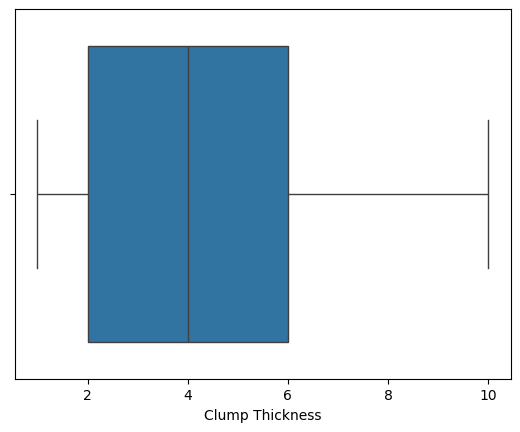

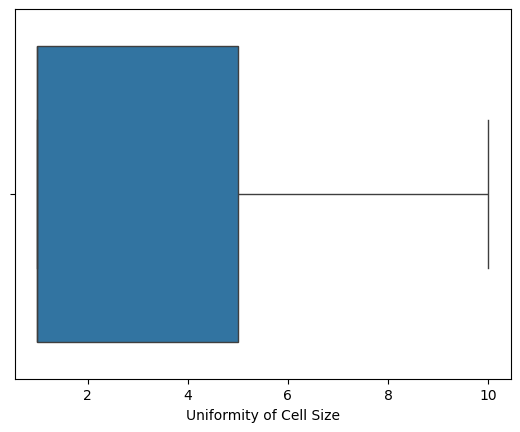

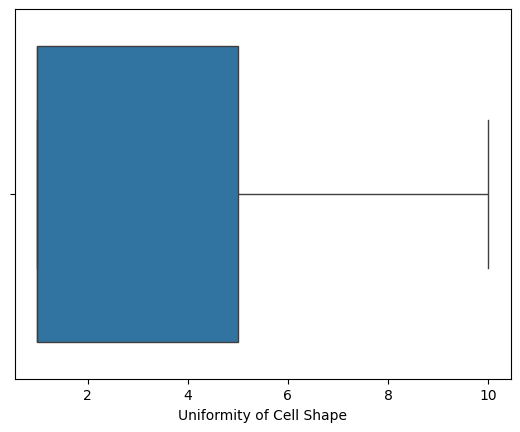

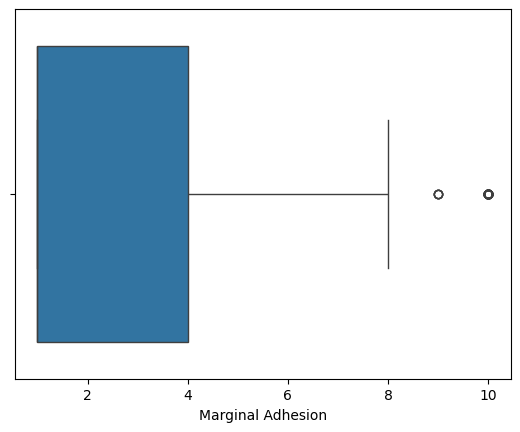

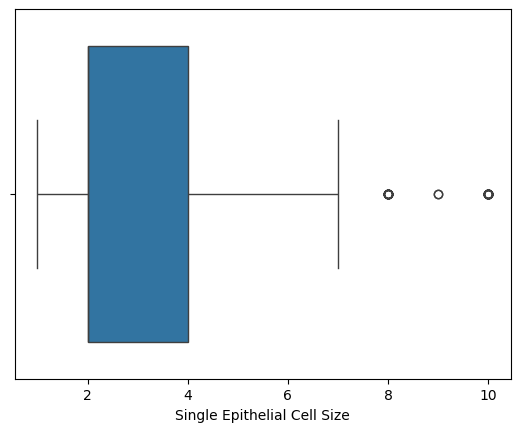

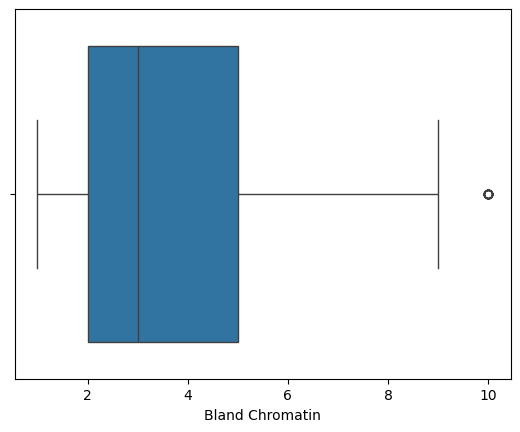

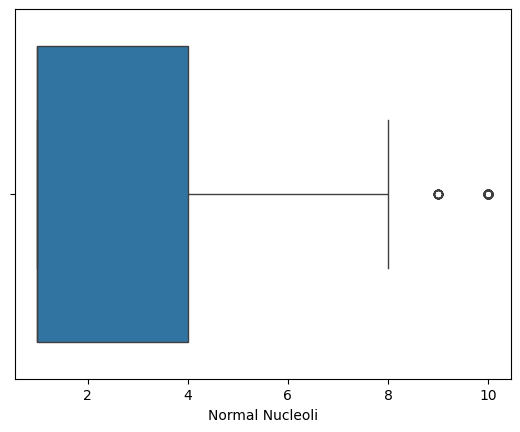

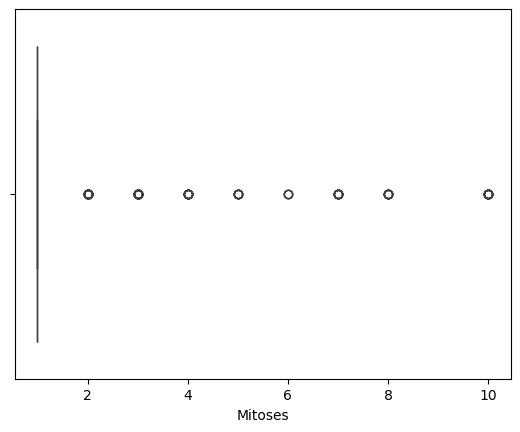

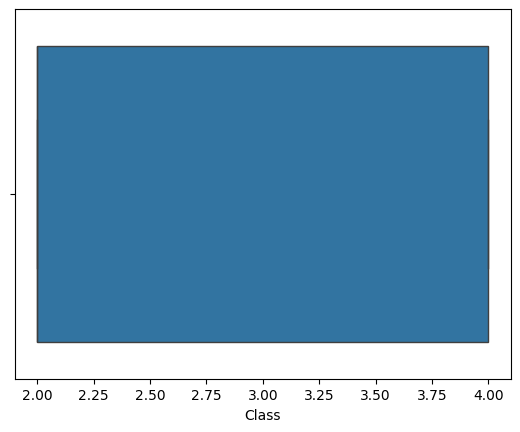

In [10]:
for i in data.select_dtypes(include='number').columns:
    sns.boxplot(data=data, x=i)
    plt.show()

In [11]:
#I would not do any outlier treatment as values vary from 1 to 10 and data such mitoses count is important
#and unique for every patient 
# => there is no sense to do this 

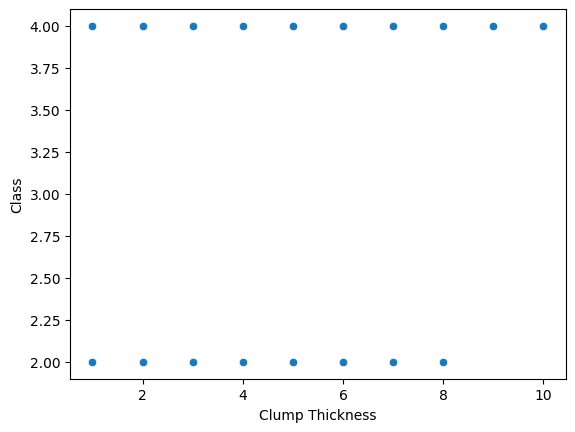

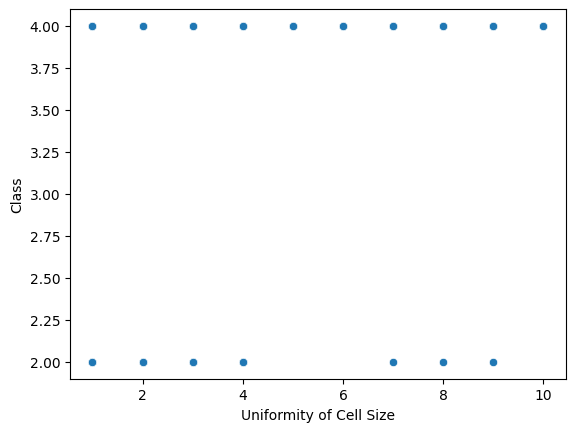

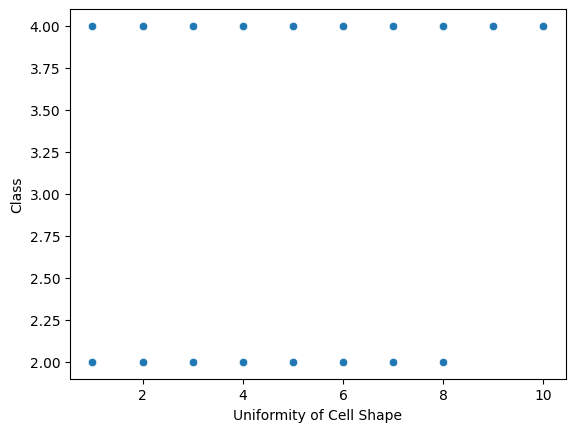

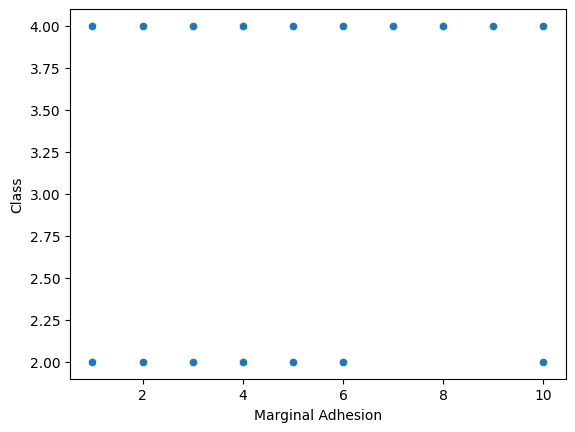

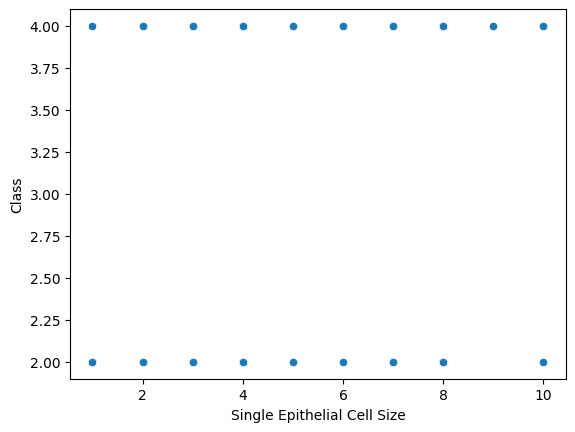

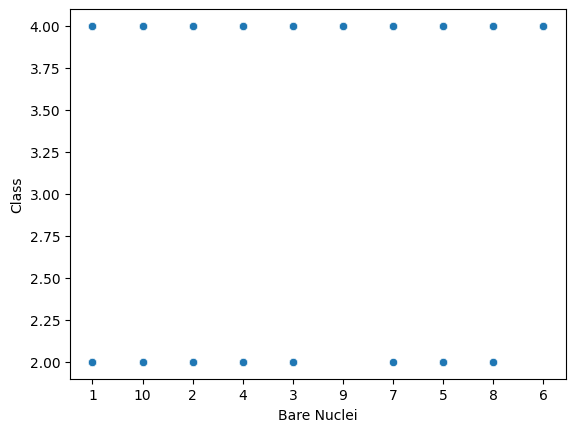

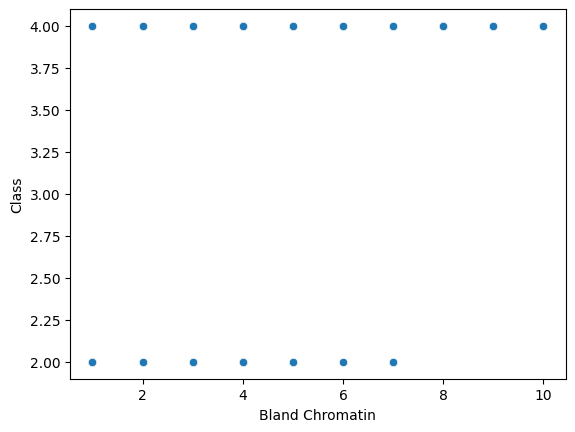

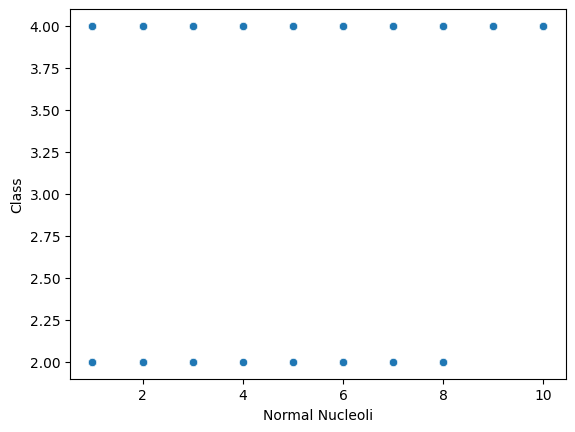

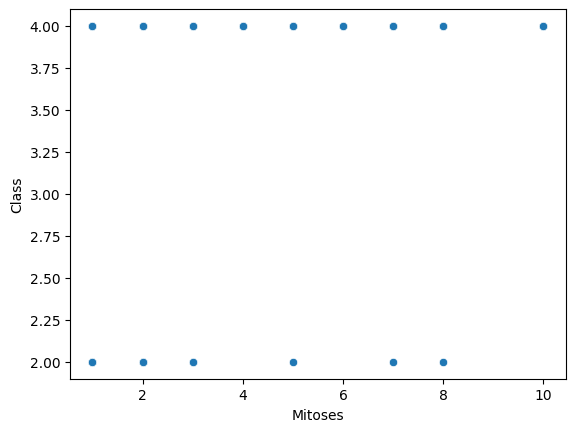

In [12]:
for i in ['Clump Thickness', 'Uniformity of Cell Size',
    'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
    'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']:
    sns.scatterplot(data=data, x = i, y = 'Class')
    plt.show()

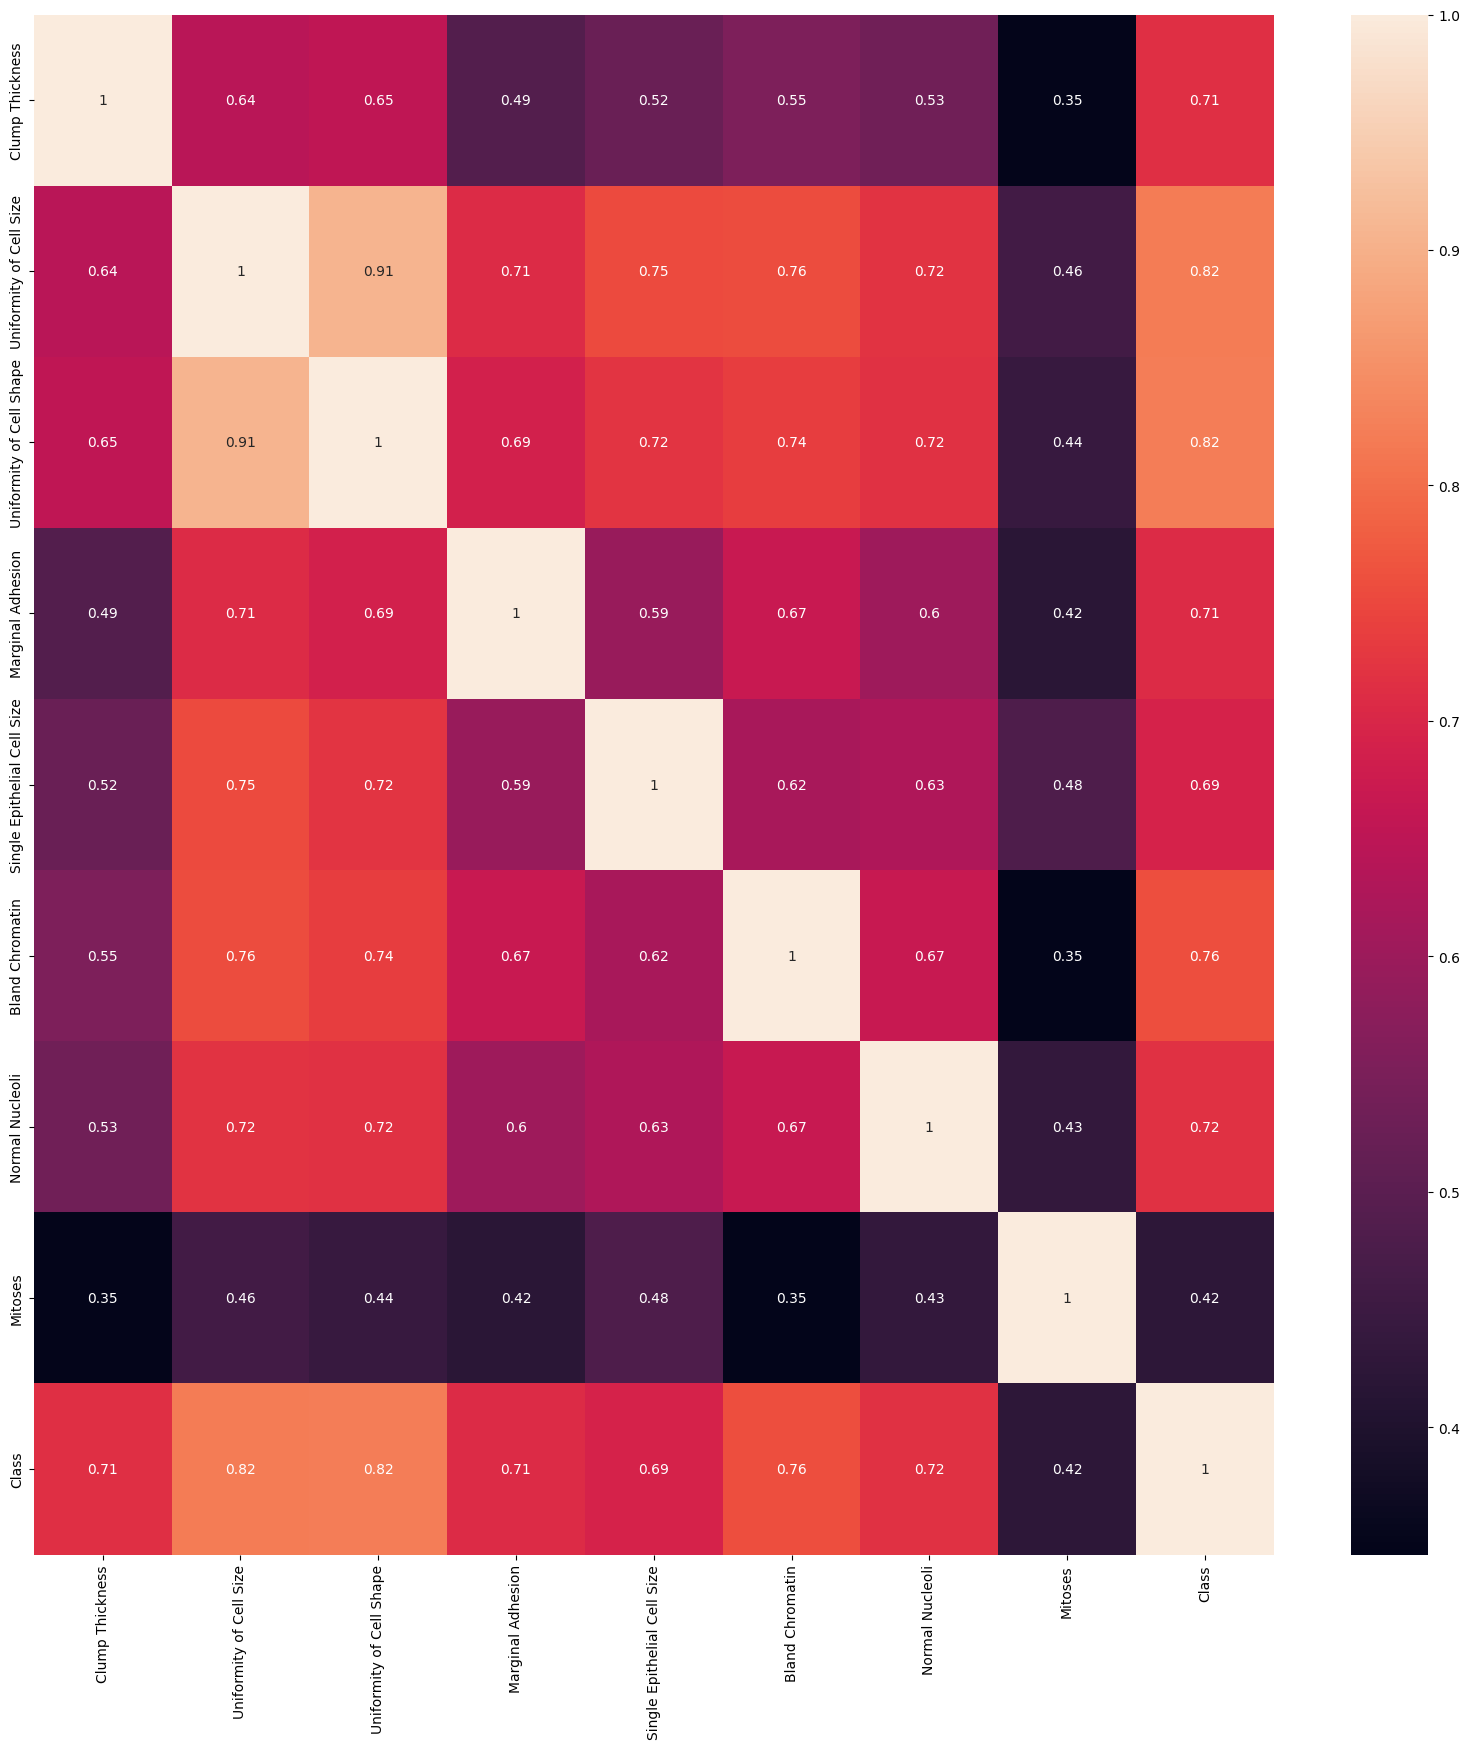

In [13]:
plt.figure(figsize=(20, 20))
s= data.select_dtypes(include='number').corr()
sns.heatmap(s, annot=True)
plt.show()